![](logo.png)

## Day Objectives 

# Polynomial Regression

- **Linear Regression with Multiple Variables**
    

$$ Y = M*X + C$$

$$ Y = M_1 * X_1 + M_2 * X_2 + M_3 * X_3 + ........... M_n * X_n + C $$
- Train/Test splitting of data
- Under fitting, Overfitting, Best fit
- Polynomial Features
- Non-Linear Regression with One variable
- Non-Linear Regression with Multiple Variable

### Polynomial Features
Polynomial provides the best approximation of the relationship between the dependent and independent variable. A Broad range of function can be fit under it. Polynomial basically fits a wide range of curvature.

[LINK](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

**Advantages of using Polynomial Regression:**

- Polynomial provides the best approximation of the relationship between the dependent and independent variable.
- A Broad range of function can be fit under it.
- Polynomial basically fits a wide range of curvature.

**Disadvantages:**

- The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
- These are too sensitive to the outliers.
- In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

# Linear regression with multiple variables

In [1]:
import pandas as pd

### To predict CO2 Consumption based on different features of vahicleS

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(1067, 13)

In [4]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data["MAKE"].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
TOYOTA           49
AUDI             49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
INFINITI         21
HONDA            21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: MAKE, dtype: int64

In [7]:
data["MODEL"].value_counts()

F150 FFV 4X4         8
F150 FFV             8
FOCUS FFV            6
BEETLE               6
ACCORD               6
                    ..
SL 65 AMG            1
XKR CONVERTIBLE      1
E 63 AMG 4MATIC      1
CHARGER AWD (MDS)    1
PILOT AWD            1
Name: MODEL, Length: 663, dtype: int64

In [9]:
len(data["VEHICLECLASS"].value_counts())

16

In [10]:
data.shape

(1067, 13)

In [11]:
data.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [14]:
X =data[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY"]]
X.head()

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY
0,9.9,8.5,6.7
1,11.2,9.6,7.7
2,6.0,5.9,5.8
3,12.7,11.1,9.1
4,12.1,10.6,8.7


In [15]:
y =data["CO2EMISSIONS"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [18]:
Xtrain.shape

(800, 3)

In [19]:
Xtest.shape

(267, 3)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lreg = LinearRegression()

In [23]:
lreg.fit(Xtrain,ytrain)

LinearRegression()

In [25]:
ypred=lreg.predict(Xtest)

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)*100

79.19645391542932

In [30]:
Xtest.iloc[100]

FUELCONSUMPTION_CITY    10.4
FUELCONSUMPTION_COMB     9.1
FUELCONSUMPTION_HWY      7.4
Name: 356, dtype: float64

In [32]:
ytest.iloc[100] # -actual -value

209

In [33]:
lreg.predict([[10.4,9.1,7.4]]) #predicqted value

array([215.44277755])

### y=mX+c - Single variable
### y =m1x1+m2x2+m3x3+c - multiple variable

In [34]:
lreg.coef_

array([16.0732682 , -2.07544013, -0.53649325])

In [35]:
lreg.intercept_

71.13734350799922

In [36]:
(16.0732682*10.4)+(-2.07544013*9.1)+(-0.53649325*7.4) +lreg.intercept_ #manual -calculation

215.44277755499925

In [ ]:
lreg.predict([[10.4,9.1,7.4]])

# Non -Linear regression/Polynomial Regression

y =mx+c+error

# To predict GDP of 2015

In [37]:
gdp =pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/china_gdp.csv")
gdp.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [39]:
len(gdp["Year"].value_counts())

55

In [40]:
gdp.shape

(55, 2)

In [41]:
gdp["Year"].min()

1960

In [42]:
gdp["Year"].max()

2014

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X=gdp[["Year"]]
y=gdp["Value"]

In [45]:
lreg.fit(X,y)

LinearRegression()

In [69]:
ypred=lreg.predict(X)

In [64]:
list(lreg.predict([[2014]]))

[4486953701684.4375]

In [65]:
list(gdp.set_index("Year").iloc[0])

[59184116488.9977]

In [66]:
list(gdp.set_index("Year").iloc[54])

[10354831729340.4]

In [52]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [67]:
list(lreg.predict([[2015]]))

[4599913401154.6875]

In [71]:
r2_score(y,ypred)*100

52.397082355747536

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly=PolynomialFeatures(degree=5)

In [75]:
XPoly=poly.fit_transform(X)
lreg.fit(XPoly,y)

LinearRegression()

In [77]:
yp=lreg.predict(XPoly)

In [80]:
r2_score(y,yp)*100

96.57218086535269

In [85]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'China -GDP Prediction')

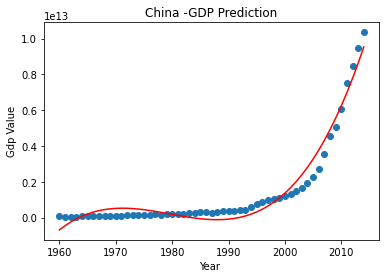

In [90]:
plt.scatter(gdp["Year"],gdp["Value"])
plt.plot(X,yp,c="r")
plt.xlabel("Year ")
plt.ylabel("Gdp Value")
plt.title("China -GDP Prediction")

In [92]:
li_acc=[]
for i in range(1,16):
    poly=PolynomialFeatures(degree=i)
    XPoly=poly.fit_transform(X)
    lreg=LinearRegression()
    lreg.fit(XPoly,y)
    yp=lreg.predict(XPoly)
    li_acc.append(r2_score(y,yp)*100)
    print(f"Polynomial degree {i} with accuracy score {r2_score(y,yp)*100}")

Polynomial degree 1 with accuracy score 52.39708235574755
Polynomial degree 2 with accuracy score 84.24443474171446
Polynomial degree 3 with accuracy score 96.45101047000898
Polynomial degree 4 with accuracy score 96.5120230215125
Polynomial degree 5 with accuracy score 96.57218086535269
Polynomial degree 6 with accuracy score 96.63149021194226
Polynomial degree 7 with accuracy score 96.68995728675763
Polynomial degree 8 with accuracy score 96.74758835396048
Polynomial degree 9 with accuracy score 96.80438971170584
Polynomial degree 10 with accuracy score 96.86036769359764
Polynomial degree 11 with accuracy score 96.9155286654676
Polynomial degree 12 with accuracy score 96.96987902292203
Polynomial degree 13 with accuracy score 97.02342519188323
Polynomial degree 14 with accuracy score 97.07617362692899
Polynomial degree 15 with accuracy score 97.12813080737529


Text(3, 96.451, '3,96.451 -this is best degree')

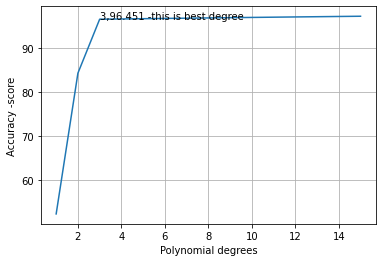

In [99]:
import numpy as np
plt.plot(np.arange(1,16),li_acc)
plt.grid()
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy -score")
plt.text(3,96.451,"3,96.451 -this is best degree")